In [5]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.python.keras.layers import Dense
from numpy.random import default_rng
from sklearn.model_selection import train_test_split

In [6]:
# data = pd.read_csv('data/walk_data_14_Fernando.txt', sep=",", header=None, names=["e_t_x","e_t_y","e_t_z","e_r_x","e_r_y","e_r_z","e_r_w","d_t_x","d_t_y","d_t_z","d_r_x","d_r_y","d_r_z","d_r_w", "c_t_x","c_t_y","c_t_z","c_r_x","c_r_y","c_r_z", "c_r_w"])
# data_fernando = pd.read_csv('data/walk_data_1_Fernando.txt', sep=",", header=None, names=["e_t_x","e_t_y","e_t_z","e_r_x","e_r_y","e_r_z","d_t_x","d_t_y","d_t_z","d_r_x","d_r_y","d_r_z","c_t_x","c_t_y","c_t_z","c_r_x","c_r_y","c_r_z"])
data = pd.read_csv('data/full_data.txt', sep=",", header=None, names=["e_t_x","e_t_y","e_t_z","e_r_x","e_r_y","e_r_z","e_r_w","d_t_x","d_t_y","d_t_z","d_r_x","d_r_y","d_r_z","d_r_w", "c_t_x","c_t_y","c_t_z","c_r_x","c_r_y","c_r_z", "c_r_w", "speed"])

In [7]:
data

,e_t_x,e_t_y,e_t_z,e_r_x,e_r_y,e_r_z,e_r_w,d_t_x,d_t_y,d_t_z,...,d_r_z,d_r_w,c_t_x,c_t_y,c_t_z,c_r_x,c_r_y,c_r_z,c_r_w,speed
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,stopped
1,0.000,-0.001,0.000,0.000,0.001,0.000,0.000,0.001,0.0,0.000,...,0.000,0.000,0.000,-0.001,0.000,0.004,0.000,0.000,-0.001,stopped
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,stopped
3,0.000,0.001,0.000,0.000,0.000,0.000,0.001,0.000,0.0,0.000,...,0.000,0.000,0.000,-0.001,0.000,0.003,0.001,0.000,0.000,stopped
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,stopped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419960,0.000,-0.002,-0.013,0.001,0.002,-0.002,-0.001,0.000,0.0,0.000,...,0.000,0.000,-0.003,0.000,0.000,-0.001,-0.001,0.002,0.000,fast
419961,0.001,-0.001,-0.014,0.001,0.001,-0.001,-0.001,0.000,0.0,0.000,...,-0.001,0.000,-0.004,0.001,0.000,-0.001,-0.001,0.002,0.000,fast
419962,0.003,-0.001,-0.012,-0.013,0.006,-0.008,-0.013,0.000,0.0,0.001,...,0.000,0.000,-0.004,0.000,0.000,-0.001,0.000,0.003,0.000,fast
419963,0.002,-0.002,-0.012,-0.004,0.006,-0.005,-0.002,0.000,0.0,0.000,...,-0.001,0.001,-0.004,0.000,-0.001,-0.001,-0.001,0.002,0.000,fast


In [8]:
result_stop = data[data.speed=="stopped"][1:]

result_stop.to_csv('data/vel_parada.txt', index=False)

In [9]:

result_slow = data[data.speed=="slow"][1:]
result_slow.to_csv('data/vel_media.txt', index=False)

In [10]:
result_fast = data[data.speed=="fast"][1:]
result_fast.to_csv('data/vel_rapida.txt', index=False)
result_fast

,e_t_x,e_t_y,e_t_z,e_r_x,e_r_y,e_r_z,e_r_w,d_t_x,d_t_y,d_t_z,...,d_r_z,d_r_w,c_t_x,c_t_y,c_t_z,c_r_x,c_r_y,c_r_z,c_r_w,speed
59996,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,fast
59997,0.000,0.000,0.000,-0.001,0.000,0.000,-0.001,-0.001,0.000,-0.013,...,-0.003,0.002,0.006,0.000,0.000,-0.001,0.002,-0.004,-0.001,fast
59998,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,fast
59999,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.001,-0.001,-0.014,...,0.002,0.005,0.005,0.000,0.000,0.001,0.002,-0.004,0.000,fast
60000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,fast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419960,0.000,-0.002,-0.013,0.001,0.002,-0.002,-0.001,0.000,0.000,0.000,...,0.000,0.000,-0.003,0.000,0.000,-0.001,-0.001,0.002,0.000,fast
419961,0.001,-0.001,-0.014,0.001,0.001,-0.001,-0.001,0.000,0.000,0.000,...,-0.001,0.000,-0.004,0.001,0.000,-0.001,-0.001,0.002,0.000,fast
419962,0.003,-0.001,-0.012,-0.013,0.006,-0.008,-0.013,0.000,0.000,0.001,...,0.000,0.000,-0.004,0.000,0.000,-0.001,0.000,0.003,0.000,fast
419963,0.002,-0.002,-0.012,-0.004,0.006,-0.005,-0.002,0.000,0.000,0.000,...,-0.001,0.001,-0.004,0.000,-0.001,-0.001,-0.001,0.002,0.000,fast


In [11]:
# Loading pipeline params.
DATA_PATH = Path('data')
FILENAME_FAST = 'vel_rapida.txt'
FILENAME_SLOW = 'vel_media.txt'
FILENAME_STOP = 'vel_parada.txt'
NUM_TIMESTEPS = 33
IGNORE_FRACTION = 0.1
TEST_FRACTION = 0.25

# Training params.
LEARNING_RATE = 1e-4
EPOCHS = 25
BATCH_SIZE = 1024

In [12]:
def load_data(
    path_stop,
    path_fast,
    path_slow,
    num_timesteps,
    ignore_fraction,
    test_fraction,
):

    def read_and_prepare_data(
        path,
        class_,
        num_timesteps,
        ignore_fraction,
        test_fraction,
    ):

        def split_temporally(X, test_fraction):
            num_samples = X.shape[0]
            num_train = int(num_samples * (1.0 - test_fraction))
            X_train, X_test = X[:num_train], X[num_train:]
            return X_train, X_test

        def transform_into_sequences(X, num_timesteps):
            num_samples = X.shape[0]
            X_seq = []
            for k in range(num_samples - num_timesteps + 1):
                X_seq.append(X[k:(k + num_timesteps)])
            X_seq = np.array(X_seq)
            y_seq = class_ * np.ones((X_seq.shape[0], 1))
            return X_seq, y_seq

        X = pd.read_csv(path).values
        X = X[:, [0,1,2,7,8,9]]  # Use only feet translations.

        # Ignore beginning and end.
        num_samples = X.shape[0]
        num_ignore = int(ignore_fraction * num_samples)
        X = X[num_ignore:-num_ignore]

        # Split X temporally.
        X_train, X_test = split_temporally(X, test_fraction)

        # Transform X into short sequences.
        X_train, y_train = transform_into_sequences(X_train, num_timesteps)
        X_test, y_test = transform_into_sequences(X_test, num_timesteps)

        return X_train, y_train, X_test, y_test

    def shuffle_data(X, y):
        idx = np.arange(len(X))
        default_rng().shuffle(idx)
        X_shuffled = X[idx, :]
        y_shuffled = y[idx]
        return X_shuffled, y_shuffled

    X_train_fast, y_train_fast, X_test_fast, y_test_fast = \
        read_and_prepare_data(
            path_fast,
            2.0,
            num_timesteps,
            ignore_fraction,
            test_fraction,
        )

    X_train_stop, y_train_stop, X_test_stop, y_test_stop = \
        read_and_prepare_data(
            path_stop,
            0.0,
            num_timesteps,
            ignore_fraction,
            test_fraction,
        )
    X_train_slow, y_train_slow, X_test_slow, y_test_slow = \
        read_and_prepare_data(
            path_slow,
            1.0,
            num_timesteps,
            ignore_fraction,
            test_fraction,
        )

    X_train = np.concatenate((X_train_fast, X_train_slow, X_train_stop), axis=0)
    y_train = np.concatenate((y_train_fast, y_train_slow, y_train_stop), axis=0)
    X_test = np.concatenate((X_test_fast, X_test_slow, X_test_stop), axis=0)
    y_test = np.concatenate((y_test_fast, y_test_slow, y_test_stop), axis=0)

    X_train, y_train = shuffle_data(X_train, y_train)
    X_test, y_test = shuffle_data(X_test, y_test)

    return X_train, X_test, y_train, y_test


path_fast = Path(DATA_PATH, FILENAME_FAST)
path_slow = Path(DATA_PATH, FILENAME_SLOW)
path_stop = Path(DATA_PATH, FILENAME_STOP)
X_train, X_test, y_train, y_test = load_data(
    path_stop,
    path_fast,
    path_slow,
    NUM_TIMESTEPS,
    IGNORE_FRACTION,
    TEST_FRACTION,
)

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((251883, 33, 6), (251883, 1), (83899, 33, 6), (83899, 1))

In [14]:
from functools import partial

_, num_time, num_feat = X_train.shape

activation = 'selu'

DefaultConv1D = partial(
    keras.layers.Conv1D,
    kernel_size=1,
    activation=activation,
    padding="valid",
)

model = keras.models.Sequential([
    DefaultConv1D(4 * num_feat, kernel_size=13, input_shape=[num_time, num_feat]),
    keras.layers.BatchNormalization(),
    DefaultConv1D(num_feat, kernel_size=5),
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(num_time * num_feat, activation=activation),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(num_feat, activation=activation),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(3, activation='softmax'),
])

2022-11-08 09:46:25.910931: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
X_train=np.array(X_train, dtype=np.float)
y_train=np.array(y_train, dtype=np.float)
X_test=np.array(X_test, dtype=np.float)
y_test=np.array(y_test, dtype=np.float)

/var/folders/0t/r6pd3gzs67n8rkyyt6l75dy80000gn/T/ipykernel_757/1231226972.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train=np.array(X_train, dtype=np.float)
/var/folders/0t/r6pd3gzs67n8rkyyt6l75dy80000gn/T/ipykernel_757/1231226972.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train=np.array(y_train, dtype=np.float)
/var

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 21, 24)            1896      
                                                                 
 batch_normalization (BatchN  (None, 21, 24)           96        
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 6)             726       
                                                                 
 flatten (Flatten)           (None, 102)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 102)              408       
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 198)               2

In [29]:
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'],
)

history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    verbose=1,
)

Epoch 1/25
246/246 [==============================] - 13s 45ms/step - loss: 0.2569 - accuracy: 0.9027 - val_loss: 0.6872 - val_accuracy: 0.7316
Epoch 2/25
246/246 [==============================] - 10s 40ms/step - loss: 0.2545 - accuracy: 0.9039 - val_loss: 1.2754 - val_accuracy: 0.5864
Epoch 3/25
246/246 [==============================] - 9s 38ms/step - loss: 0.2531 - accuracy: 0.9043 - val_loss: 0.6841 - val_accuracy: 0.7129
Epoch 4/25
246/246 [==============================] - 10s 39ms/step - loss: 0.2499 - accuracy: 0.9057 - val_loss: 1.1569 - val_accuracy: 0.3598
Epoch 5/25
246/246 [==============================] - 12s 47ms/step - loss: 0.2487 - accuracy: 0.9063 - val_loss: 1.1895 - val_accuracy: 0.6196
Epoch 6/25
246/246 [==============================] - 16s 64ms/step - loss: 0.2467 - accuracy: 0.9071 - val_loss: 0.6201 - val_accuracy: 0.7441
Epoch 7/25
246/246 [==============================] - 49s 199ms/step - loss: 0.2449 - accuracy: 0.9079 - val_loss: 0.8569 - val_accuracy:

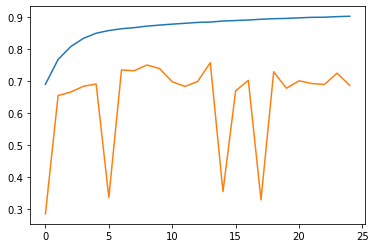

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

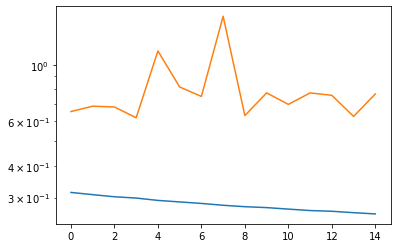

In [19]:
plt.plot(history.history['loss'][10:])
plt.plot(history.history['val_loss'][10:])
plt.yscale('log')

In [20]:
y_pred = model.predict(X_test)

2622/2622 [==============================] - 4s 2ms/step


In [21]:
y_pred

array([[8.9557695e-01, 9.0176113e-02, 1.4246963e-02],
       [9.9909258e-01, 7.6994591e-04, 1.3749201e-04],
       [2.5526693e-03, 6.5422785e-01, 3.4321949e-01],
       ...,
       [1.6447364e-01, 4.8590785e-01, 3.4961855e-01],
       [3.2289229e-02, 6.4991230e-01, 3.1779850e-01],
       [1.0202968e-02, 5.3703088e-01, 4.5276615e-01]], dtype=float32)

In [22]:
model.evaluate(X_test, y_test)

2622/2622 [==============================] - 5s 2ms/step - loss: 0.7681 - accuracy: 0.6862


[0.7680842876434326, 0.6862418055534363]

In [23]:
y_pred= np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [25]:
y_pred[0]

0

In [26]:
df = pd.DataFrame({
    'y_test': y_test.ravel().astype(int).tolist(),
    'y_pred': y_pred.ravel().astype(int).tolist(),
})

In [27]:
pd.crosstab(df['y_test'], df['y_pred'])

y_pred,0,1,2
y_test,,,
0,35234,371,360
1,5234,15576,3157
2,1024,16178,6765


In [28]:
model.save('model.h5')

In [ ]:
X_train[0]

In [ ]:
np.argmax(model.predict(np.array([[[0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08],
       [0.08,  0.08,  0.08,  0.08, -0.08, -0.08, -0.08,  0.08]]])))

In [ ]:
x_new = X_test[0,:,:]

In [ ]:
argmax(model.predict(np.array([[[-0.04,  0.69,  0.72,  0.07, -0.19, -0.63, -0.71,  0.23],
       [-0.13,  0.69,  0.7 ,  0.14, -0.19, -0.64, -0.71,  0.23],
       [-0.22,  0.67,  0.67,  0.23, -0.19, -0.64, -0.71,  0.23],
       [-0.25,  0.67,  0.65,  0.25, -0.19, -0.64, -0.71,  0.23],
       [-0.31,  0.65,  0.63,  0.3 , -0.19, -0.64, -0.71,  0.23],
       [-0.35,  0.63,  0.6 ,  0.34, -0.19, -0.64, -0.71,  0.23],
       [-0.34,  0.64,  0.61,  0.33, -0.19, -0.64, -0.71,  0.23],
       [-0.34,  0.64,  0.61,  0.33, -0.19, -0.64, -0.71,  0.23],
       [-0.24,  0.67,  0.66,  0.25, -0.19, -0.64, -0.71,  0.23],
       [-0.12,  0.69,  0.7 ,  0.14, -0.19, -0.64, -0.71,  0.23]]])))

In [ ]:
x_new.shape

In [ ]:
(1,) + x_new.shape

In [ ]:
X_new = x_new.reshape((1,) + x_new.shape)
fast_or_slow = saved_model(X_new)

In [ ]:
float(fast_or_slow[0, 0])

In [ ]:
print(X_new.tolist())


In [ ]:
model.save('model.h5')

In [ ]:
np.fromstring(X_new.tobytes(), dtype=float).reshape(1,10,4)

In [ ]:
comma_string = "[[[-1.402271e-03 -2.203955e-08 7.028995e-07 9.999990e-01 -2.328306e-10 -6.455648e-09 7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00]]])"

In [ ]:
spaces_string = comma_string.replace(' ', ',')
spaces_string

In [ ]:
import ast
input = np.array([[[0.08, 0.14, 0.09, 0.18],
       [0.08, 0.14, 0.09, 0.22],
       [0.08, 0.14, 0.08, 0.17],
       [0.08, 0.14, 0.08, 0.1 ],
       [0.08, 0.14, 0.07, 0.08],
       [0.08, 0.14, 0.07, 0.08],
       [0.09, 0.2 , 0.07, 0.08],
       [0.1 , 0.32, 0.07, 0.07],
       [0.1 , 0.29, 0.07, 0.07],
       [0.09, 0.24, 0.07, 0.07]]])
    
lista_string="[0.08, 0.14, 0.09, 0.18]"
lista= ast.literal_eval(lista_string)
input = np.insert(input[0], 0,lista).reshape(1,11,4)
input = input[:,:-1,:]
input

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
/content/my_model

In [ ]:
!zip -r model.zip model/ 

In [ ]:
print(json_str)

In [ ]:
input = np.array([[[ 2.66, -1.94,  0.66, -0.07],
       [ 2.66, -1.94,  0.66, -0.07],
       [ 2.65, -2.1 ,  0.66, -0.07],
       [ 2.65, -2.2 ,  0.66, -0.07],
       [ 2.65, -2.22,  0.66, -0.07],
       [ 2.65, -2.22,  0.68,  0.01],
       [ 2.64, -2.22,  0.68,  0.18],
       [ 2.64, -2.22,  0.69,  0.26],
       [ 2.64, -2.22,  0.67,  0.16],
       [ 2.64, -2.22,  0.67,  0.03]]])

In [ ]:
import ast
lista_string="[ 2.66, -1.94,  0.66, -0.07]"
lista= ast.literal_eval(lista_string)
input = np.append(input[0],[lista],axis=0).reshape(1,11,4)
input = input[:,1:,:]

In [ ]:
input

In [ ]:
X_train[0]

In [ ]:
import re

s = "[[[-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00] [-1.402271e-03 -2.203955e-08  7.028995e-07  9.999990e-01 -2.328306e-10 -6.455648e-09  7.037297e-07  1.000000e+00]]]"

def add_comma(match):
    return match.group(0) + ','

s = re.sub(r'\[[0-9\.\s]+\]', add_comma, s)
s = re.sub(r'([0-9\.]+)', add_comma, s)
mylist = eval(s)

In [ ]:
mylist